### 作业要求：

生成圆环的数据为$X = [X_1 | X_2 ]$

在X中加入$(X_1)^2 , (X_1)^2, X_1 · X_2 $

并使用新的X作为输入

In [1]:
import itertools

import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from scipy import signal

import cv2

%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist
import keras.backend as K

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

/anaconda2/envs/TF36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 1. 生成数据

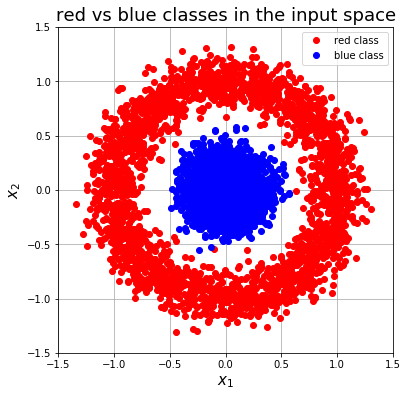

In [56]:
X,y = make_circles(n_samples=5000, shuffle=False, noise=0.12, random_state=None, factor=0.2)
x_red = X[y==0]
x_blue = X[y==1]
plt.figure(figsize=(6,6))
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='red class')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='blue class')
plt.grid(b=None, which='major', axis='both')
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classes in the input space',fontsize=18)
plt.show()

# 加入多维变量

In [28]:
X_new = X

In [29]:
x_3 = X[:,0]**2
x_4 = X[:,1]**2
x_5 = X[:,0]*X[:,1]

In [30]:
X_new = np.insert(X_new, 2, values=x_3, axis=1)
X_new = np.insert(X_new, 3, values=x_4, axis=1)
X_new = np.insert(X_new, 4, values=x_5, axis=1)

In [32]:
X_new[:5]

array([[ 1.19492144e+00, -7.34107696e-02,  1.42783726e+00,
         5.38914110e-03, -8.77201028e-02],
       [ 9.36616231e-01, -1.26242963e-01,  8.77249965e-01,
         1.59372858e-02, -1.18241208e-01],
       [ 1.10383628e+00, -2.71158117e-01,  1.21845454e+00,
         7.35267242e-02, -2.99314167e-01],
       [ 1.20934899e+00, -8.38050772e-02,  1.46252497e+00,
         7.02329096e-03, -1.01349585e-01],
       [ 1.03823416e+00, -1.98715179e-02,  1.07793017e+00,
         3.94877224e-04, -2.06312887e-02]])

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size = 0.3, random_state = 0)

## 建立模型(简单模型，只有一个输入层，一个输出层）

In [37]:
model = Sequential()
model.add(Dense(1, input_shape = (5,), kernel_initializer = 'glorot_normal', activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), verbose = 1, batch_size = 64, epochs = 20)

Train on 3500 samples, validate on 1500 samples
Epoch 1/20
3500/3500 [==============================] - 1s 163us/step - loss: 0.6687 - acc: 0.5631 - val_loss: 0.6683 - val_acc: 0.5953
Epoch 2/20
3500/3500 [==============================] - 0s 29us/step - loss: 0.6544 - acc: 0.6020 - val_loss: 0.6544 - val_acc: 0.6280
Epoch 3/20
3500/3500 [==============================] - 0s 29us/step - loss: 0.6406 - acc: 0.6411 - val_loss: 0.6409 - val_acc: 0.6593
Epoch 4/20
3500/3500 [==============================] - 0s 30us/step - loss: 0.6273 - acc: 0.6897 - val_loss: 0.6279 - val_acc: 0.7067
Epoch 5/20
3500/3500 [==============================] - 0s 29us/step - loss: 0.6146 - acc: 0.7351 - val_loss: 0.6150 - val_acc: 0.7567
Epoch 6/20
3500/3500 [==============================] - 0s 31us/step - loss: 0.6022 - acc: 0.7749 - val_loss: 0.6029 - val_acc: 0.8027
Epoch 7/20
3500/3500 [==============================] - 0s 29us/step - loss: 0.5903 - acc: 0.8077 - val_loss: 0.5911 - val_acc: 0.8393
Epoch 

In [38]:
def nn_predict(model, X_new):
    return (model.predict(X_new) > 0.5).astype(int)

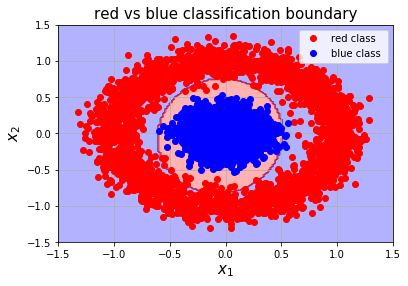

In [39]:
#Plot the resulting decision boundary
#Generate a grid over the input space to plot the color of the
#classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-2, 2, num = nb_of_xs)
xs2 = np.linspace(-2, 2, num = nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
#Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        pred = nn_predict(model, np.array([[xx[i,j], yy[i,j],xx[i,j]**2,yy[i,j]**2,xx[i,j]*yy[i,j]]]))
        classification_plane[i, j] = pred[0, 0]
#Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha = 0.30),
        colorConverter.to_rgba('r', alpha = 0.30)])

#Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label = 'red class')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label = 'blue class ')
plt.grid()
plt.legend(loc = 1)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classification boundary',fontsize = 15)
plt.show()

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
y_val_pred = nn_predict(model, X_val)
#Show confusion table
conf_matrix = confusion_matrix(y_val, y_val_pred, labels = None)

Confusion matrix, without normalization
[[710  11]
 [  2 777]]


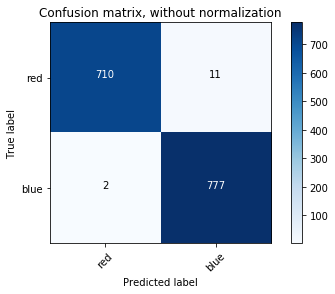

In [53]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['red', 'blue'],
                      title='Confusion matrix, without normalization',normalize=0)

# 添加一个隐藏层试试 

In [44]:
X_train.shape

(3500, 5)

In [45]:
X_val.shape

(1500, 5)

In [43]:
def rbf_np(z):
    return np.exp(-z**2)

In [48]:
model_2 = Sequential()
model_2.add(Dense(6, input_shape = (5,),kernel_initializer = 'glorot_normal'))
model_2.add(Activation(rbf))
model_2.add(Dense(1, input_shape = (6,), kernel_initializer = 'glorot_normal', activation = 'sigmoid'))
model_2.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')
history = model_2.fit(X_train, y_train, validation_data = (X_val, y_val), verbose = 1, batch_size = 32, epochs = 20)

Train on 3500 samples, validate on 1500 samples
Epoch 1/20
3500/3500 [==============================] - 1s 211us/step - loss: 0.7304 - acc: 0.3663 - val_loss: 0.6811 - val_acc: 0.3313
Epoch 2/20
3500/3500 [==============================] - 0s 61us/step - loss: 0.6415 - acc: 0.6374 - val_loss: 0.6048 - val_acc: 0.8540
Epoch 3/20
3500/3500 [==============================] - 0s 69us/step - loss: 0.5768 - acc: 0.8577 - val_loss: 0.5419 - val_acc: 0.8940
Epoch 4/20
3500/3500 [==============================] - 0s 62us/step - loss: 0.5134 - acc: 0.9237 - val_loss: 0.4770 - val_acc: 0.9667
Epoch 5/20
3500/3500 [==============================] - 0s 66us/step - loss: 0.4477 - acc: 0.9831 - val_loss: 0.4124 - val_acc: 0.9920
Epoch 6/20
3500/3500 [==============================] - 0s 72us/step - loss: 0.3848 - acc: 0.9946 - val_loss: 0.3513 - val_acc: 0.9960
Epoch 7/20
3500/3500 [==============================] - 0s 65us/step - loss: 0.3267 - acc: 0.9949 - val_loss: 0.2961 - val_acc: 0.9960
Epoch 

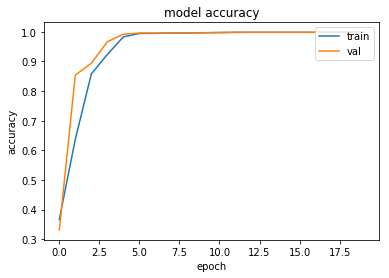

In [49]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=1)
plt.show()

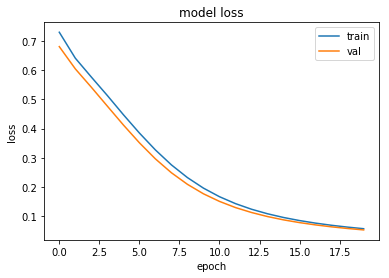

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

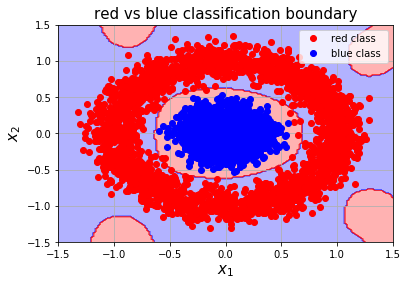

In [51]:
#Plot the resulting decision boundary
#Generate a grid over the input space to plot the color of the
#classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-2, 2, num = nb_of_xs)
xs2 = np.linspace(-2, 2, num = nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
#Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        pred = nn_predict(model_2, np.array([[xx[i,j], yy[i,j],xx[i,j]**2,yy[i,j]**2,xx[i,j]*yy[i,j]]]))
        classification_plane[i, j] = pred[0, 0]
#Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha = 0.30),
        colorConverter.to_rgba('r', alpha = 0.30)])

#Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label = 'red class')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label = 'blue class ')
plt.grid()
plt.legend(loc = 1)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classification boundary',fontsize = 15)
plt.show()

In [54]:
y_val_pred = nn_predict(model_2, X_val)
#Show confusion table
conf_matrix = confusion_matrix(y_val, y_val_pred, labels = None)

Confusion matrix, without normalization
[[719   2]
 [  0 779]]


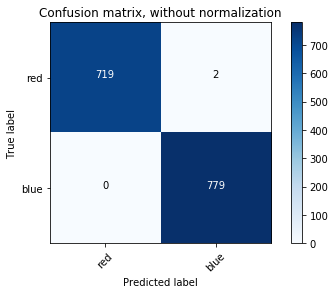

In [55]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['red', 'blue'],
                      title='Confusion matrix, without normalization',normalize=0)